In [1]:
#importing modules and libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from scipy.stats import skew
from scipy.stats import kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("C:/Users/Dell/Documents/surveyresults.csv")
df.head()

,Gender,Age,Frequency,Airports,Satisfaction,Factors,Rating,Initiatives,Likeliness_Initiatives,Impactful_actions,Responsibility,PayHigher,SustainablePractices,Influence,PublicTransport
0,Male,25-34,1,"Amsterdam, Frankfurt, Istanbul, Pearson",4,"Price/Cost, Time of Day, Baggage Allowance, La...",2,Water conservation measures,2,Energy-efficient operations and infrastructure...,1,0,Using solar panels,2,d) It depends on the availability and cost of ...
1,Male,35-44,3,"Amsterdam, Frankfurt, Dubai",3,"Price/Cost, Lounge Access",4,"Energy-efficient lighting systems, Electric ve...",3,Energy-efficient operations and infrastructure,1,1,Jet fuel efficiency,3,"a) Very likely, I always prefer public transpo..."
2,Female,18-24,1,"Frankfurt, Istanbul",2,"Price/Cost, Airline Reliability, Baggage Allow...",3,"Energy-efficient lighting systems, Electric ve...",1,"Waste reduction and recycling programs, Use of...",1,0,Using an altenative to fossil fuels,3,"b) Somewhat likely, I might consider public tr..."
3,Female,18-24,2,Frankfurt,3,Time of Day,3,"Renewable energy sources (solar panels, wind t...",3,Water conservation measures,0,0,Reusable water bottles,2,"b) Somewhat likely, I might consider public tr..."
4,Female,25-34,2,"Amsterdam, Frankfurt, Heathrow, Istanbul",3,"Price/Cost, Time of Day, Layover Duration, Air...",4,"Energy-efficient lighting systems, Renewable e...",3,Energy-efficient operations and infrastructure...,1,1,Use of renewal energy sources,3,"b) Somewhat likely, I might consider public tr..."


In [4]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

Gender                    0
Age                       0
Frequency                 0
Airports                  0
Satisfaction              0
Factors                   0
Rating                    0
Initiatives               0
Likeliness_Initiatives    0
Impactful_actions         0
Responsibility            0
PayHigher                 0
SustainablePractices      0
Influence                 0
PublicTransport           0
dtype: int64


In [46]:
# Summary statistics for the data
df.describe()

,Frequency,Satisfaction,Rating,Likeliness_Initiatives,Responsibility,PayHigher,Influence
count,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,1.761905,3.650794,3.682540,2.873016,0.968254,0.714286,2.587302
std,0.776973,0.721976,1.044577,1.211398,0.176731,0.455383,0.612634
min,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,2.000000
50%,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,3.000000
75%,2.000000,4.000000,4.000000,4.000000,1.000000,1.000000,3.000000
max,4.000000,5.000000,5.000000,5.000000,1.000000,1.000000,3.000000


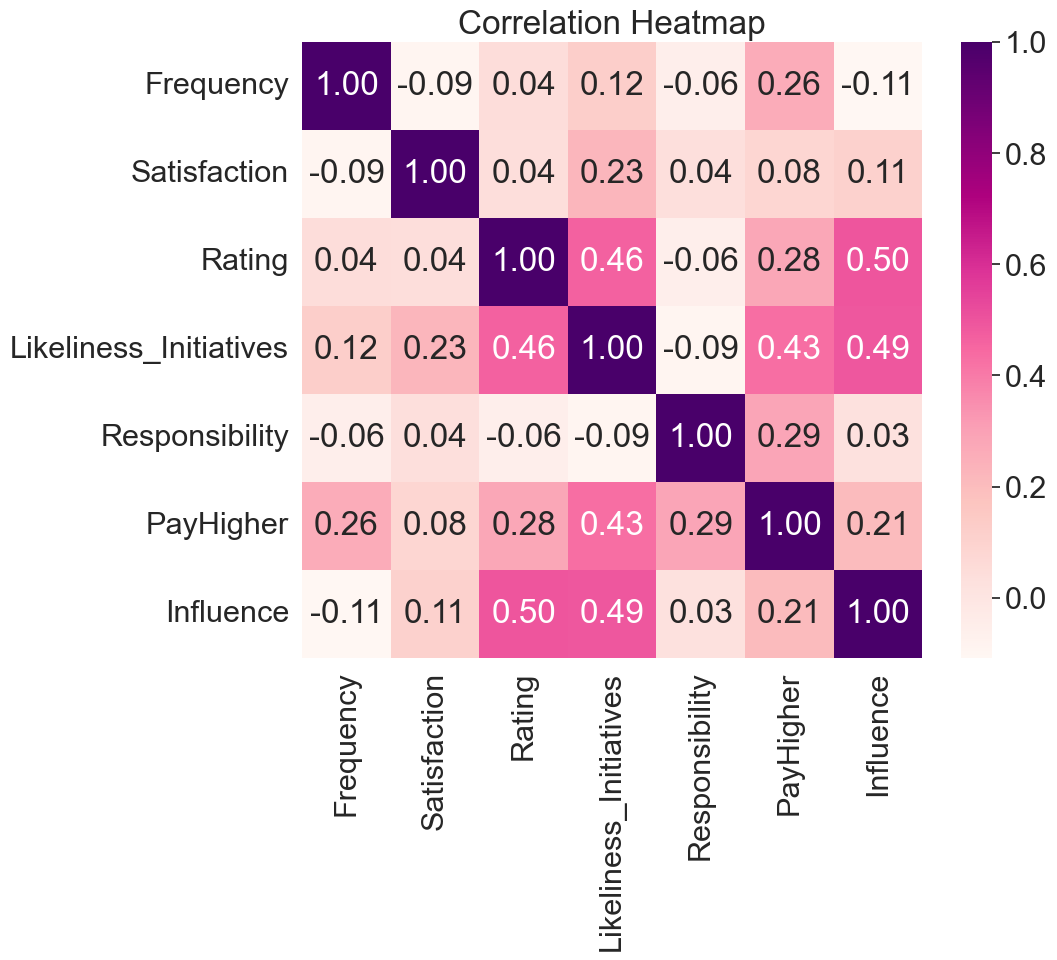

In [47]:
# Correlation between variables with a HeatMap
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdPu', fmt=".2f")
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


In [8]:
df.columns

Index(['Gender', 'Age', 'Frequency', 'Airports', 'Satisfaction', 'Factors',
       'Rating', 'Initiatives', 'Likeliness_Initiatives', 'Impactful_actions',
       'Responsibility', 'PayHigher', 'SustainablePractices', 'Influence',
       'PublicTransport'],
      dtype='object')

In [19]:
text = df['Airports']

In [25]:
df['Airports'] = df['Airports'].str.replace(',', '')

In [26]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [27]:
df.head(10)

,Gender,Age,Frequency,Airports,Satisfaction,Factors,Rating,Initiatives,Likeliness_Initiatives,Impactful_actions,Responsibility,PayHigher,SustainablePractices,Influence,PublicTransport
0,Male,25-34,1,Amsterdam Frankfurt Istanbul Pearson,4,"Price/Cost, Time of Day, Baggage Allowance, La...",2,Water conservation measures,2,Energy-efficient operations and infrastructure...,"Yes, absolutely","No, I would not be willing to pay more",Using solar panels,"b) Somewhat positively, it's a nice gesture bu...",d) It depends on the availability and cost of ...
1,Male,35-44,3,Amsterdam Frankfurt Dubai,3,"Price/Cost, Lounge Access",4,"Energy-efficient lighting systems, Electric ve...",3,Energy-efficient operations and infrastructure,"Yes, absolutely","Yes, if the increase is reasonable",Jet fuel efficiency,"a) Very positively, I appreciate their commitm...","a) Very likely, I always prefer public transpo..."
2,Female,18-24,1,Frankfurt Istanbul,2,"Price/Cost, Airline Reliability, Baggage Allow...",3,"Energy-efficient lighting systems, Electric ve...",1,"Waste reduction and recycling programs, Use of...","Yes, to some extent","No, I would not be willing to pay more",Using an altenative to fossil fuels,"a) Very positively, I appreciate their commitm...","b) Somewhat likely, I might consider public tr..."
3,Female,18-24,2,Frankfurt,3,Time of Day,3,"Renewable energy sources (solar panels, wind t...",3,Water conservation measures,"No, not really","No, I would not be willing to pay more",Reusable water bottles,"b) Somewhat positively, it's a nice gesture bu...","b) Somewhat likely, I might consider public tr..."
4,Female,25-34,2,Amsterdam Frankfurt Heathrow Istanbul,3,"Price/Cost, Time of Day, Layover Duration, Air...",4,"Energy-efficient lighting systems, Renewable e...",3,Energy-efficient operations and infrastructure...,"Yes, absolutely","Yes, if the increase is reasonable",Use of renewal energy sources,"a) Very positively, I appreciate their commitm...","b) Somewhat likely, I might consider public tr..."
5,Female,25-34,2,Frankfurt Heathrow Istanbul,3,"Price/Cost, Airline Partnerships, Airline Reli...",3,"Waste recycling programs, Renewable energy sou...",2,Energy-efficient operations and infrastructure,"Yes, absolutely","No, I would not be willing to pay more",None,"b) Somewhat positively, it's a nice gesture bu...","c) Not likely at all, I prefer using my privat..."
6,Female,35-44,1,Istanbul Pearson Dubai,5,"Price/Cost, Baggage Allowance, Layover Duratio...",3,Electric vehicle charging stations,3,Energy-efficient operations and infrastructure,"Yes, absolutely","No, I would not be willing to pay more","Green , different means public transport","a) Very positively, I appreciate their commitm...","a) Very likely, I always prefer public transpo..."
7,Female,35-44,1,Istanbul,4,"Price/Cost, Baggage Allowance, Airport Infrast...",4,"Energy-efficient lighting systems, Waste recyc...",4,"Waste reduction and recycling programs, Use of...","Yes, absolutely","Yes, if the increase is reasonable",Less advertisement \nLess alcohol \nMore space...,"c) No effect, I don't consider these amenities...","b) Somewhat likely, I might consider public tr..."
8,Female,18-24,2,Heathrow Istanbul Montreal int. LAX Gatwick Br...,4,"Price/Cost, Layover Duration, Lounge Access, A...",5,"Energy-efficient lighting systems, Waste recyc...",5,Energy-efficient operations and infrastructure...,"Yes, absolutely","Yes, definitely",Localised energy management such as solar and ...,"a) Very positively, I appreciate their commitm...","b) Somewhat likely, I might consider public tr..."
9,Female,25-34,2,Pearson YVR LAX MCO HKG ICN NRT HND,4,"Time of Day, Baggage Transfer, Duration of Fli...",1,"Renewable energy sources (solar panels, wind t...",1,Energy-efficient operations and infrastructure...,"Yes, to some extent","Yes, if the increase is reasonable",I would prefer to see more electric charging s...,"c) No effect, I don't consider these amenities...",d) It depends on the availability an

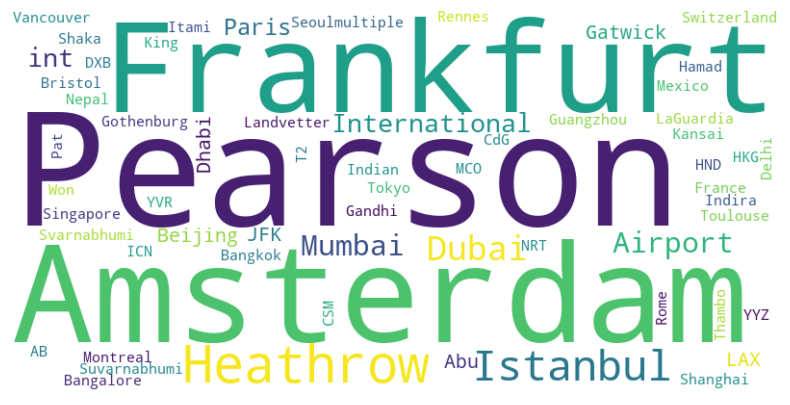

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you already have a DataFrame 'df'
# Replace 'column_name' with the actual column name containing text
text = " ".join(df['Airports'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


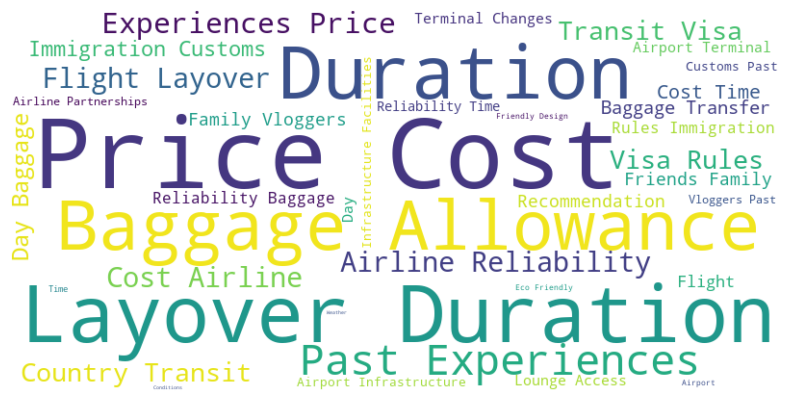

In [31]:
text = " ".join(df['Factors'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

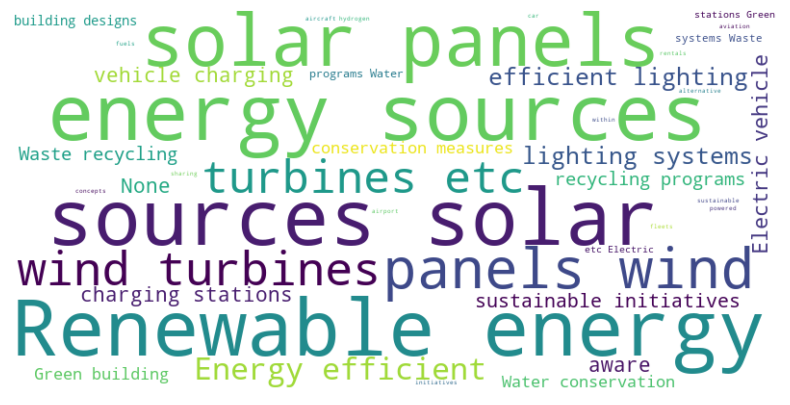

In [32]:
text = " ".join(df['Initiatives'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

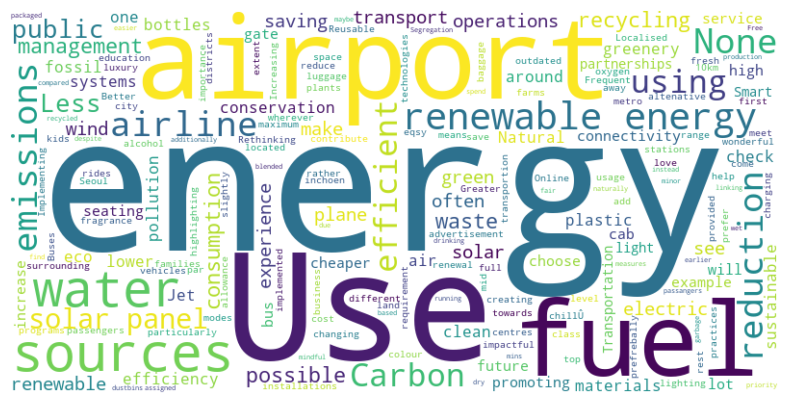

In [33]:
text = " ".join(df['SustainablePractices'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [37]:
df['Subjectivity'] = df['SustainablePractices'].apply(getSubjectivity)
df['Polarity'] = df['SustainablePractices'].apply(getPolarity)
df.head()

,Gender,Age,Frequency,Airports,Satisfaction,Factors,Rating,Initiatives,Likeliness_Initiatives,Impactful_actions,Responsibility,PayHigher,SustainablePractices,Influence,PublicTransport,Subjectivity,Polarity
0,Male,25-34,1,Amsterdam Frankfurt Istanbul Pearson,4,"Price/Cost, Time of Day, Baggage Allowance, La...",2,Water conservation measures,2,Energy-efficient operations and infrastructure...,"Yes, absolutely","No, I would not be willing to pay more",Using solar panels,"b) Somewhat positively, it's a nice gesture bu...",d) It depends on the availability and cost of ...,0.0,0.0
1,Male,35-44,3,Amsterdam Frankfurt Dubai,3,"Price/Cost, Lounge Access",4,"Energy-efficient lighting systems, Electric ve...",3,Energy-efficient operations and infrastructure,"Yes, absolutely","Yes, if the increase is reasonable",Jet fuel efficiency,"a) Very positively, I appreciate their commitm...","a) Very likely, I always prefer public transpo...",0.0,0.0
2,Female,18-24,1,Frankfurt Istanbul,2,"Price/Cost, Airline Reliability, Baggage Allow...",3,"Energy-efficient lighting systems, Electric ve...",1,"Waste reduction and recycling programs, Use of...","Yes, to some extent","No, I would not be willing to pay more",Using an altenative to fossil fuels,"a) Very positively, I appreciate their commitm...","b) Somewhat likely, I might consider public tr...",0.0,0.0
3,Female,18-24,2,Frankfurt,3,Time of Day,3,"Renewable energy sources (solar panels, wind t...",3,Water conservation measures,"No, not really","No, I would not be willing to pay more",Reusable water bottles,"b) Somewhat positively, it's a nice gesture bu...","b) Somewhat likely, I might consider public tr...",0.0,0.0
4,Female,25-34,2,Amsterdam Frankfurt Heathrow Istanbul,3,"Price/Cost, Time of Day, Layover Duration, Air...",4,"Energy-efficient lighting systems, Renewable e...",3,Energy-efficient operations and infrastructure...,"Yes, absolutely","Yes, if the increase is reasonable",Use of renewal energy sources,"a) Very positively, I appreciate their commitm...","b) Somewhat likely, I might consider public tr...",0.0,0.0


In [38]:
df['Polarity'].value_counts()

 0.000000    36
-0.200000     5
 0.500000     4
 0.400000     2
 0.077778     1
 0.366667     1
-0.071429     1
 0.154762     1
-0.166667     1
 0.025000     1
 0.218750     1
 0.166667     1
 0.218333     1
-0.066667     1
 0.100000     1
 0.150000     1
 0.183333     1
 0.038095     1
 0.055556     1
-0.020000     1
Name: Polarity, dtype: int64

In [39]:
df['Subjectivity'].value_counts()

0.000000    38
0.500000     4
0.300000     4
0.066667     2
0.600000     1
0.700000     1
0.214286     1
0.647619     1
0.700000     1
0.343750     1
0.283333     1
0.455625     1
0.322222     1
0.650000     1
0.850000     1
0.550000     1
0.576190     1
0.211111     1
0.270000     1
Name: Subjectivity, dtype: int64

In [40]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

df['Analysis_Polarity'] = df['Polarity'].apply(get_Polarity_Analysis)

df['Analysis_Subjectivity'] = df['Subjectivity'].apply(get_Subjectivity_Analysis)

In [41]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

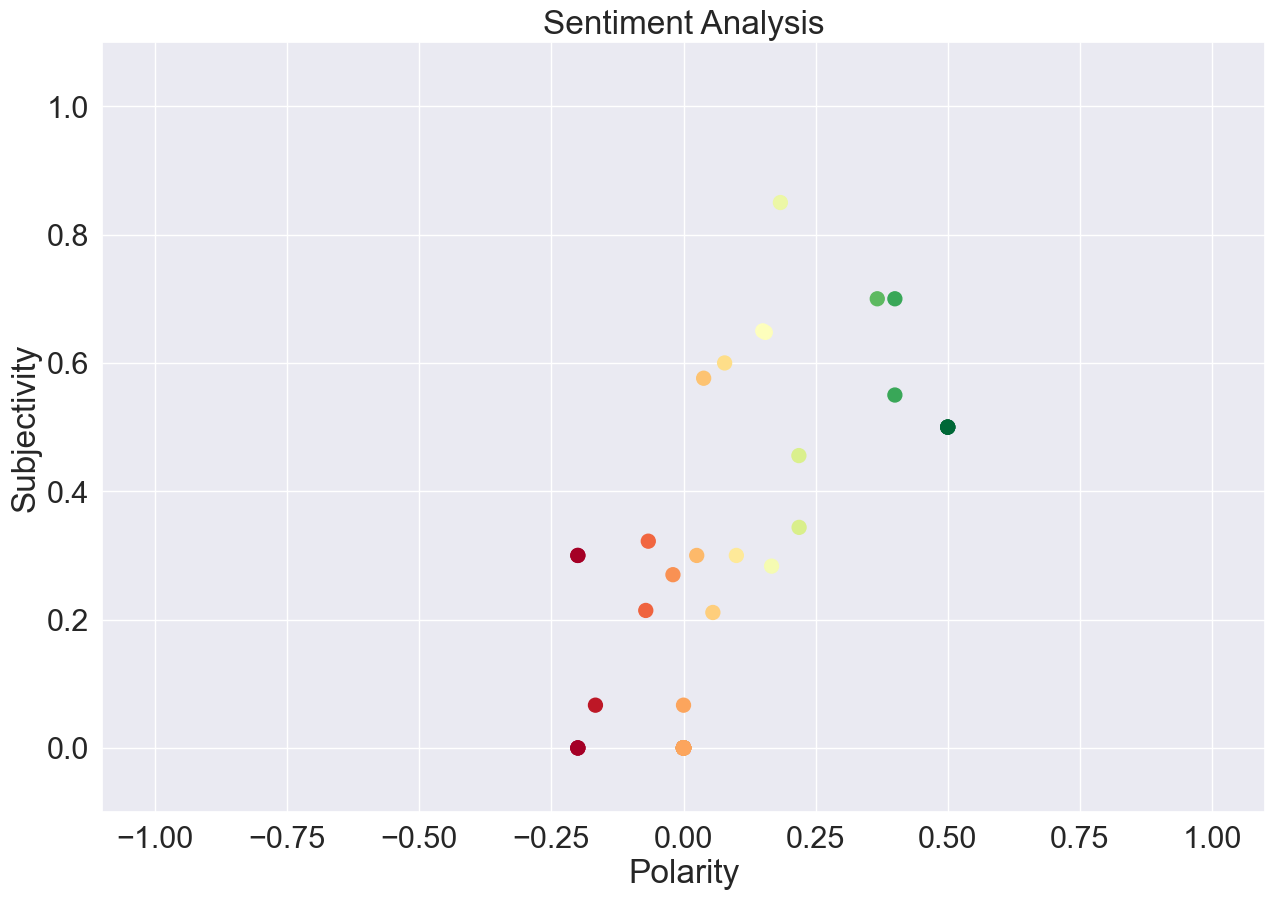

(None,)

In [42]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(df['Polarity'], df['Subjectivity'], c=df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

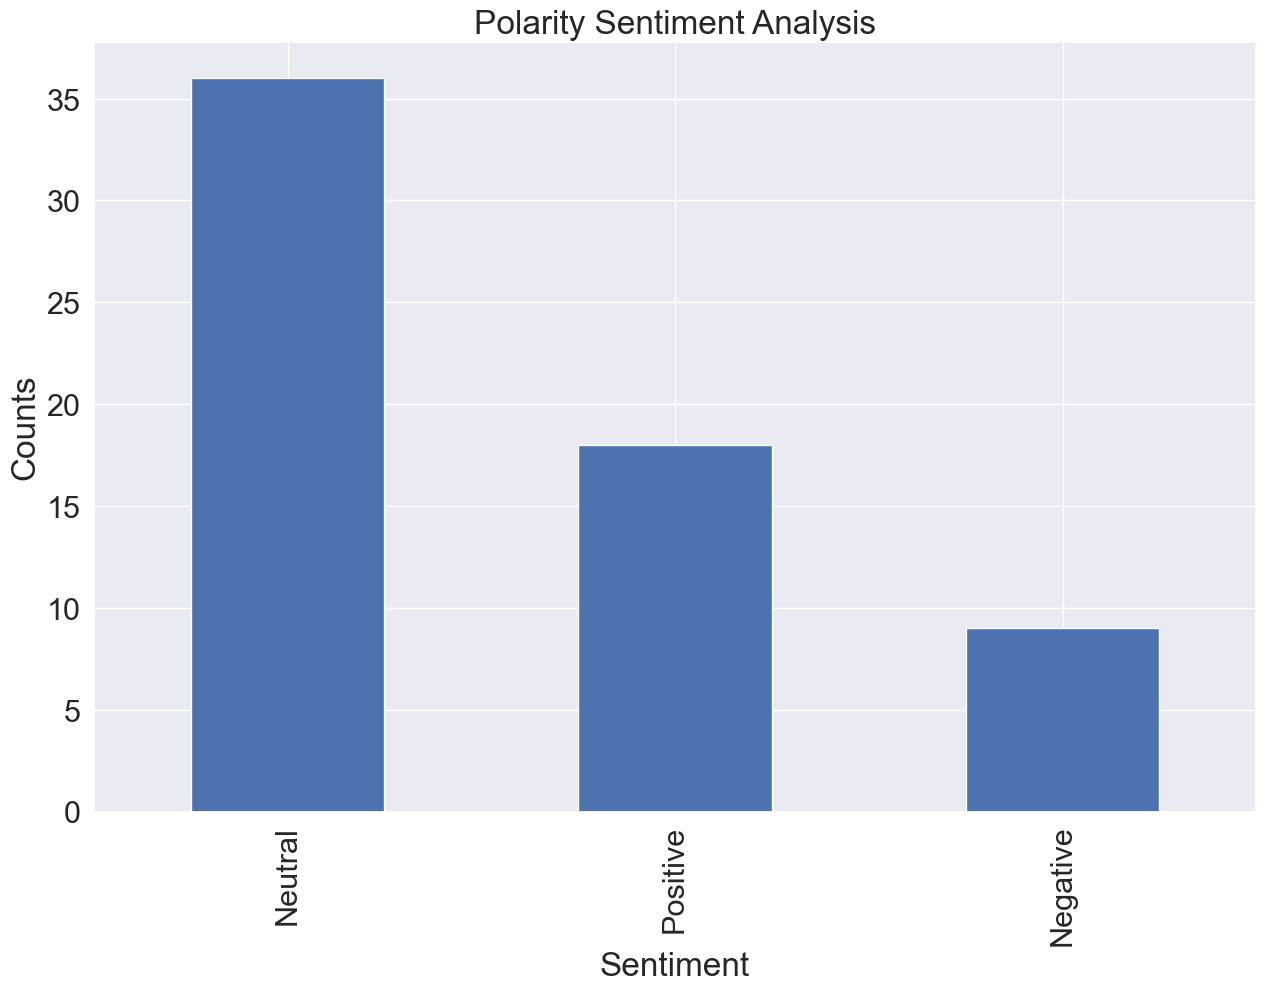

In [43]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

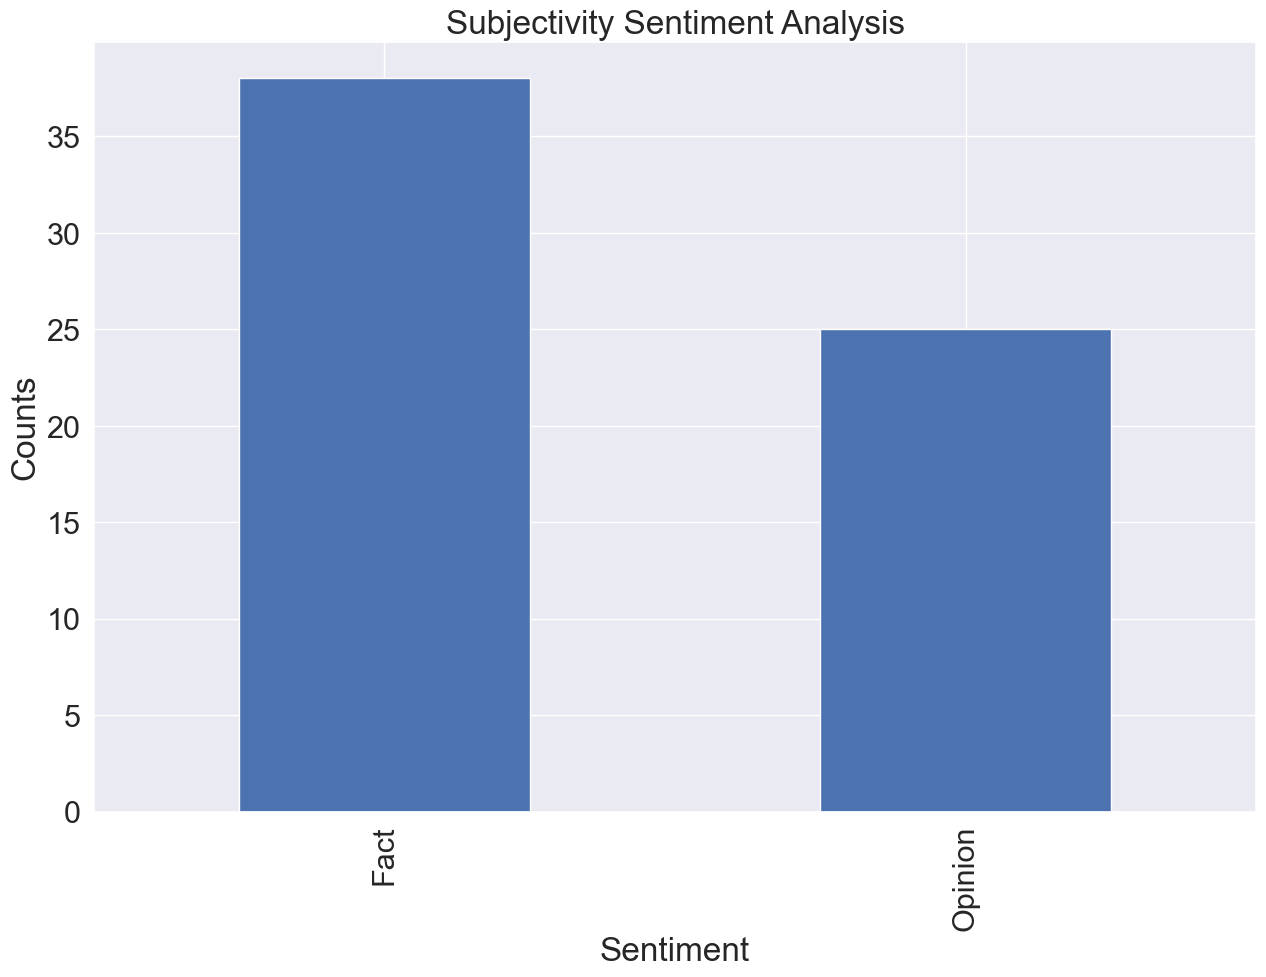

In [44]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()